### in this notebook will deal with the data as binary calssification problem 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score , GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
%matplotlib inline

In [ ]:
mu = df.body.mean()
def cand_logic(body):
    if body < mu:
        return 1
    elif body > 0:
        return 2
    else:
        return 0

df['state'] = df.body.apply(cand_logic)


In [46]:
from yahoo_finance import Share

In [62]:
google = Share('GOOGL')
google = google.get_historical('2011-04-25', '2014-04-29')

In [71]:
ndf = pd.DataFrame(google)
ndf.drop('Symbol',axis=1,inplace=True)

In [72]:
ndf.head()

,Adj_Close,Close,Date,High,Low,Open,Volume
0,536.330017,536.330017,2014-04-29,537.76001,523.00,523.890015,2535200
1,522.97998,522.97998,2014-04-28,525.900024,511.00,525.799988,3752800
2,523.099976,523.099976,2014-04-25,533.859985,522.50,532.26001,2370000
3,534.440002,534.440002,2014-04-24,542.50,531.00,541.690002,2067400
4,537.51001,537.51001,2014-04-23,544.799988,528.130005,543.669983,1955700


In [73]:
for i in ndf.columns:
    if i == 'Date':
        pass
    else:
        ndf[i] = ndf[i].astype('float',)

In [74]:
a = ndf[['Open','Close']]

In [86]:
ndf['body'] = ndf.Close - ndf.Open

In [88]:
ndf.head()

,Adj_Close,Close,Date,High,Low,Open,Volume,body
0,536.330017,536.330017,2014-04-29,537.760010,523.000000,523.890015,2535200.0,12.440002
1,522.979980,522.979980,2014-04-28,525.900024,511.000000,525.799988,3752800.0,-2.820008
2,523.099976,523.099976,2014-04-25,533.859985,522.500000,532.260010,2370000.0,-9.160034
3,534.440002,534.440002,2014-04-24,542.500000,531.000000,541.690002,2067400.0,-7.250000
4,537.510010,537.510010,2014-04-23,544.799988,528.130005,543.669983,1955700.0,-6.159973


In [77]:
sum(n < 0)

386

In [90]:
mu = df.body.mean()
def cand_logic(body):
    if body > 0:
        return 1
    else:
        return 0

ndf['state'] = ndf.body.apply(cand_logic)

In [91]:
ndf

,Adj_Close,Close,Date,High,Low,Open,Volume,body,state
0,536.330017,536.330017,2014-04-29,537.760010,523.000000,523.890015,2535200.0,12.440002,1
1,522.979980,522.979980,2014-04-28,525.900024,511.000000,525.799988,3752800.0,-2.820008,0
2,523.099976,523.099976,2014-04-25,533.859985,522.500000,532.260010,2370000.0,-9.160034,0
3,534.440002,534.440002,2014-04-24,542.500000,531.000000,541.690002,2067400.0,-7.250000,0
4,537.510010,537.510010,2014-04-23,544.799988,528.130005,543.669983,1955700.0,-6.159973,0
5,545.500000,545.500000,2014-04-22,548.000000,536.000000,536.000000,2331100.0,9.500000,1
6,539.369995,539.369995,2014-04-21,544.000000,534.000000,544.000000,2425100.0,-4.630005,0
7,543.340027,543.340027,2014-04-17,557.000000,539.400024,556.320007,5614700.0,-12.979980,0
8,563.900024,563.900024,2014-04-16,564.000000,553.099976,557.700012,4582200.0,6.200012,1
9,548.700012,548.700012,2014-04-15,552.890015,530.640015,551.000000,3997800.0,-2.299988,0


In [101]:
def shift_down(s):
    """returns the col shifted one cell down"""
    #make the first value to be the mean of the input
    m = s.mode()
    y = pd.Series([m])
    #append the input col.. to the one val y 
    y = y.append(s)
    #delete the last val
    y[len(y)-1] = np.nan
    y.dropna(inplace=True)
    y = y.reset_index()
    y = y.drop(['index'],axis=1)
    y[0] = 0
    return y

ndf['nest_state'] = shift_down(ndf.state)

In [117]:
uu = ndf[ndf['state'] == ndf.nest_state]

In [126]:
a = len(uu)

In [127]:
ud = ndf[ndf['state'] != ndf.nest_state]
b = len(ud)

# numbers of up candels and down

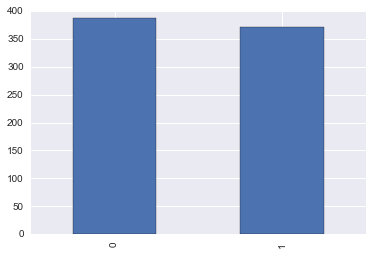

In [141]:
l = [a,b]
pd.Series(l).plot(kind='bar')